In [78]:
import astropy
from astropy import cosmology
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

In [79]:
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20

In [80]:
fn_psmf_bgs = '../data/psmf.sv3.bgs_bright.z0.01_0.05.dat'
ms, psmf_bgs_mean, psmf_bgs_std = np.loadtxt(fn_psmf_bgs, unpack=True)

In [81]:
# SNIPPET FROM CHANG
# moustakas+(2013)
# logM* is in Msun/h70^2
# Phi is in Mpc^3/h70^3
m13_logms = np.linspace(9., 12., 31) + np.log10(0.7**2)
m13_logsmf = np.array([-1.899, -1.923, -1.970, -2.031, -2.055, -2.106, -2.144,
                       -2.179, -2.188, -2.216, -2.234, -2.236, -2.262, -2.252, 
                       -2.285, -2.317, -2.365, -2.419, -2.504, -2.607, -2.728, 
                       -2.888, -3.104, -3.332, -3.606, -3.953, -4.363, -4.778, 
                       -5.255, -5.87, -6.49])

print(astropy.cosmology.Planck13.H0.value)
m13_logsmf -= np.log10((astropy.cosmology.Planck13.H0.value / 70)**3)
m13_logsmf_sig = np.array([0.052, 0.048, 0.059, 0.052, 0.050, 0.053, 0.046, 0.051, 
                           0.046, 0.048, 0.047, 0.045, 0.046, 0.049, 0.045, 0.046, 
                           0.049, 0.049, 0.047, 0.046, 0.046, 0.043, 0.041, 0.042, 
                           0.042, 0.047, 0.050, 0.057, 0.066, 0.1, 0.2])

67.77


In [82]:
m13_smf = 10**m13_logsmf

In [83]:
# KSF attempt
# Moustakas 2013, Table 3
# log M in h_70^-2 Msun
# log Phi in h_70^3 Mpc^-3 dex^-1
# From Moustakas 2013: h70 ≡ H0/(70 km s−1 Mpc−1) = 1.0

m13ksf_log_m_msun = np.array([9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 
                              10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0])
m13ksf_log_phi_Mpcn3 = np.array([-1.899, -1.923, -1.970, -2.031, -2.055, -2.106, -2.144, -2.179, -2.188, -2.216, -2.234, 
                                 -2.235, -2.262, -2.252, -2.285, -2.317, -2.365, -2.419, -2.504, -2.607, -2.728, -2.888, 
                                 -3.104, -3.332, -3.606, -3.953, -4.363, -4.778, -5.255, -5.870, -6.490])
h = 0.678 # assumed in chang paper (~Planck13)
h70 = h*100 / 70
print(f'h_70 = {h70}')
print(f'h_70^-2 = {h70**-2}')
print(f'h_70^3 = {h70**3}')

# to get from h_70^-2 Msun to just Msun, plug in that h_70^-2, but log so add instead of multiply:
m13ksf_log_m_msun += np.log10(h70**-2)

m13ksf_phi_Mpcn3 = 10**m13ksf_log_phi_Mpcn3
# to get from h_70^3 Mpc^-3 dex^-1 to just Mpc^-3 dex^-1, plug in that h_70^3:
m13ksf_phi_Mpcn3 *= h70**3

# X Mpc^-3 = X Mpc^-3 * (h^3/0.7^3) = X/0.7^3 * h^3 Mpc^-3 = X/0.7^3 * (Mpc/h)^-3
# now going from Mpc^-3 to (Mpc/h)^-3, so divide by 0.7^3
m13ksf_phi_h3Mpcn3 = h**-3 * m13ksf_phi_Mpcn3

h_70 = 0.9685714285714287
h_70^-2 = 1.0659496523698886
h_70^3 = 0.9086465072886303


Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, (\\mathrm{Mpc}/h)^{-3}]$')

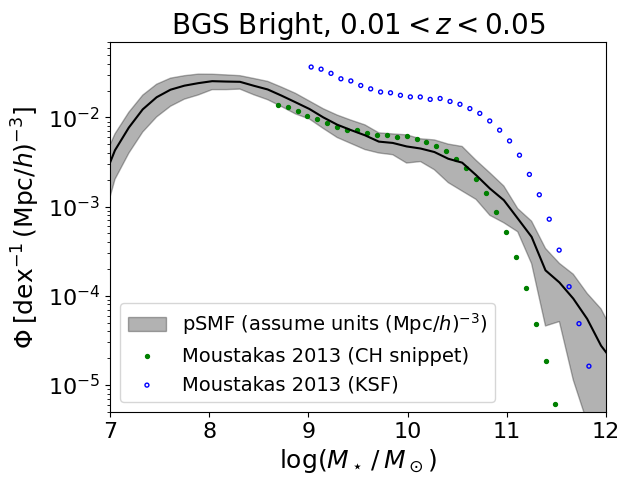

In [84]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label=r'pSMF (assume units $(\mathrm{Mpc}/h)^{-3}$)')

plt.scatter(m13_logms, m13_smf, color='green', marker='o', s=8,
         label='Moustakas 2013 (CH snippet)')

plt.scatter(m13ksf_log_m_msun, m13ksf_phi_h3Mpcn3, color='blue', marker='o', facecolor='None', s=8,
                 label='Moustakas 2013 (KSF)')

plt.legend(loc='lower left')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, (\mathrm{Mpc}/h)^{-3}]$')

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, \\mathrm{Mpc}^{-3}]$')

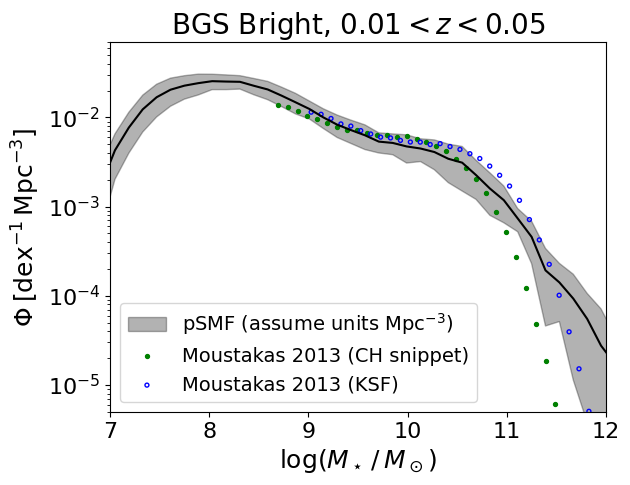

In [85]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label=r'pSMF (assume units $\mathrm{Mpc}^{-3}$)')

plt.scatter(m13_logms, m13_smf, color='green', marker='o', s=8,
         label='Moustakas 2013 (CH snippet)')

plt.scatter(m13ksf_log_m_msun, m13ksf_phi_Mpcn3, color='blue', marker='o', facecolor='None', s=8,
                 label='Moustakas 2013 (KSF)')

plt.legend(loc='lower left')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')
